In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from sklearn.metrics import confusion_matrix
from sklearn import metrics
warnings.filterwarnings('ignore')

# Task 1 : Loading the Dataset and Plotting

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

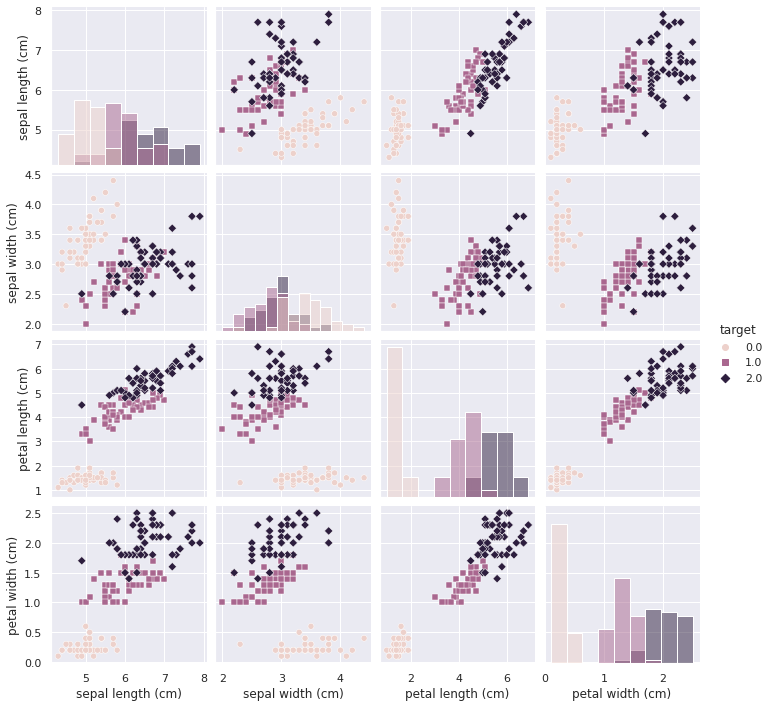

In [4]:
sns.pairplot(df, hue='target', diag_kind="hist", markers=["o", "s", "D"])
plt.show()

# Task 2: Data Classification

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data.data,data.target, test_size=0.2, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
data_train.shape[0], target_test.shape[0]))

There are 120 samples in the training set and 30 samples in the test set


## KNN 

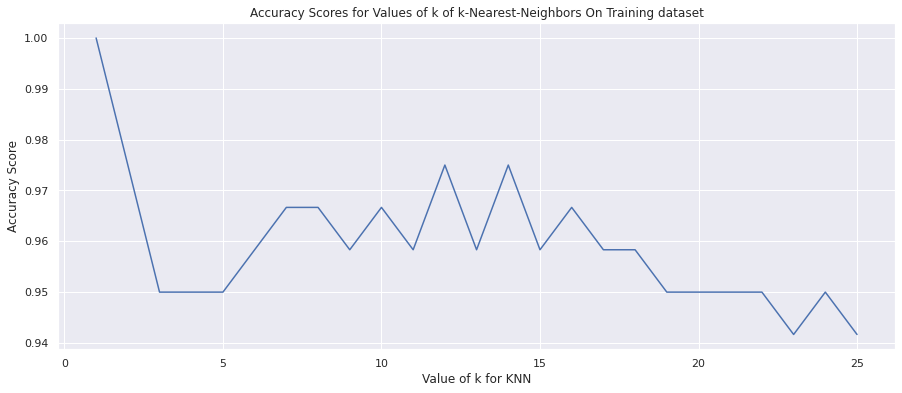

In [6]:
# experimenting with different n values
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, target_train)
    y_pred = knn.predict(data_train)
    scores.append(metrics.accuracy_score(target_train, y_pred))
    
plt.figure(figsize=(15, 6))    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors On Training dataset')
plt.show()

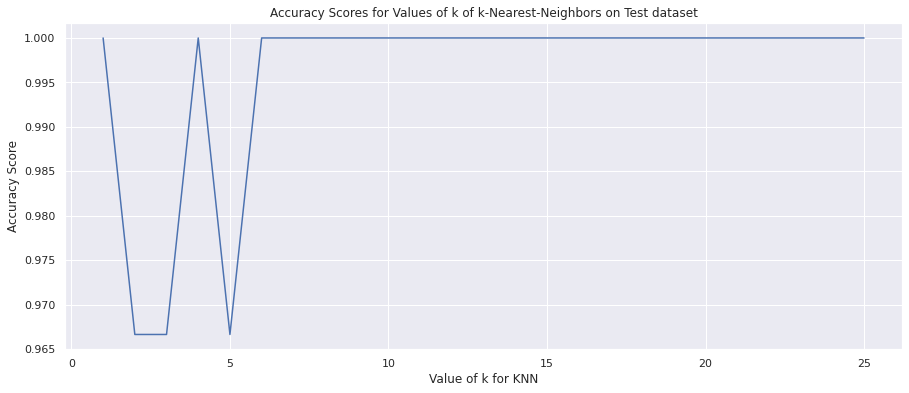

In [7]:
score = []
k_range = list(range(1,26))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, target_train)
    y_pred = knn.predict(data_test)
    score.append(metrics.accuracy_score(target_test, y_pred))
plt.figure(figsize=(15, 6))    
plt.plot(k_range, score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors on Test dataset')
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(data_train, target_train)
y_pred = knn.predict(data_test)

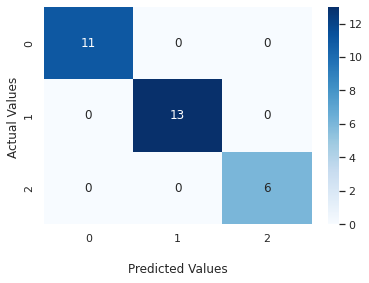

In [9]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Multi Layer Perceptron

In [10]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(70,),
                    activation='tanh', solver='adam', 
                    shuffle=True, max_iter = 300,
                    alpha=0.0001)
mlp.fit(data_train,target_train)
y_pred = mlp.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for Multilayer Perceptron On Training dataset:{}'.format(score))

Accuracy Scores for Multilayer Perceptron On Training dataset:0.975


In [11]:
y_pred = mlp.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for Multilayer Perceptron On Test dataset:{}'.format(score))

Accuracy Scores for Multilayer Perceptron On Test dataset:1.0


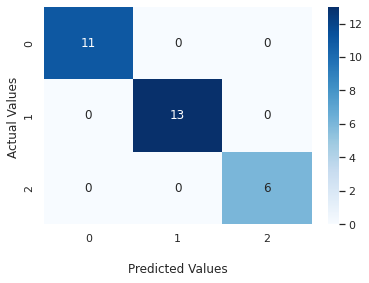

In [12]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(data_train, target_train)
y_pred = log.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for Logistic Regression On Training dataset:{}'.format(score))

Accuracy Scores for Logistic Regression On Training dataset:0.9666666666666667


In [14]:
y_pred = log.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for Logistic Regression On Test dataset:{}'.format(score))

Accuracy Scores for Logistic Regression On Test dataset:1.0


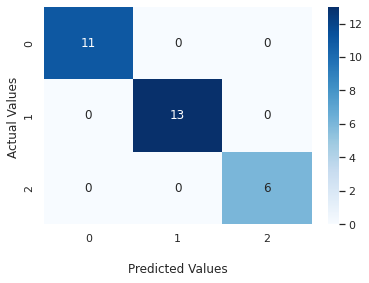

In [15]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Support Vector Machine: RBF Kernel

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_rbf = SVC(kernel = 'rbf',gamma='auto')
svm_rbf.fit(data_train,target_train)
y_pred = svm_rbf.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for SVM:RBF On Training dataset:{}'.format(score))

Accuracy Scores for SVM:RBF On Training dataset:0.975


In [17]:
y_pred = svm_rbf.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for SVM:RBF On Test dataset:{}'.format(score))

Accuracy Scores for SVM:RBF On Test dataset:1.0


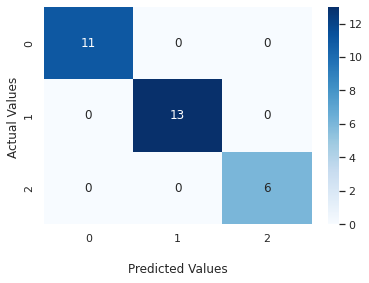

In [18]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Support Vector Machine: Linear Kernel

In [19]:
svm_linear = SVC(kernel = 'linear',gamma='auto')
svm_linear.fit(data_train,target_train)
y_pred = svm_linear.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for SVM:Linear On Training dataset:{}'.format(score))

Accuracy Scores for SVM:Linear On Training dataset:0.975


In [20]:
y_pred = svm_linear.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for SVM:Linear On Test dataset:{}'.format(score))

Accuracy Scores for SVM:Linear On Test dataset:1.0


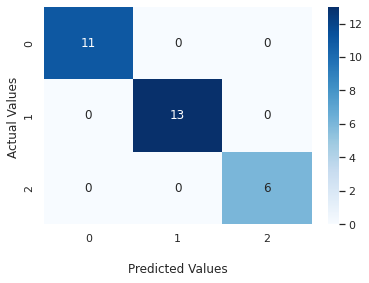

In [21]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Support Vector Machine: Poly Kernel

In [22]:
svm_poly = SVC(kernel = 'poly',gamma='auto')
svm_poly.fit(data_train,target_train)
y_pred = svm_poly.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for SVM:Poly On Training dataset:{}'.format(score))

Accuracy Scores for SVM:Poly On Training dataset:0.975


In [23]:
y_pred = svm_poly.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for SVM:Poly On Test dataset:{}'.format(score))

Accuracy Scores for SVM:Poly On Test dataset:1.0


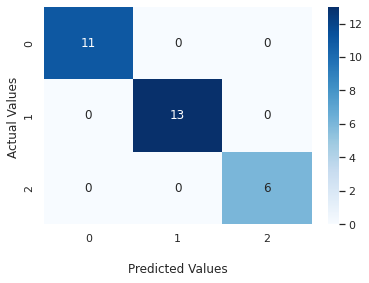

In [24]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(data_train,target_train)
y_pred = decision_tree.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for DecisionTreeClassifier On Training dataset:{}'.format(score))

Accuracy Scores for DecisionTreeClassifier On Training dataset:1.0


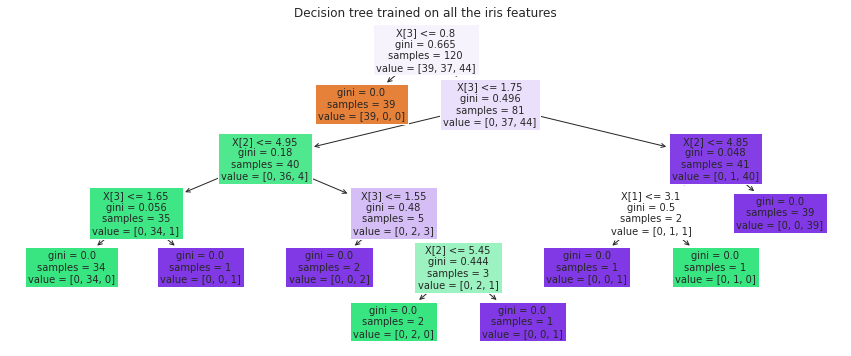

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,6))
plot_tree(decision_tree, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [27]:
y_pred = decision_tree.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for DecisionTreeClassifier On Test dataset:{}'.format(score))

Accuracy Scores for DecisionTreeClassifier On Test dataset:1.0


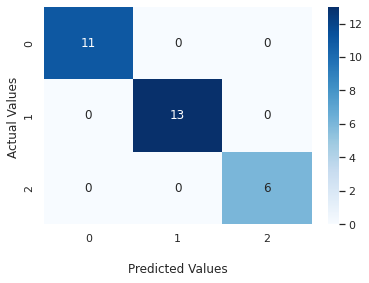

In [28]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 15,random_state=0)
random_forest.fit(data_train,target_train)
y_pred = random_forest.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for RandomForestClassifier On Training dataset:{}'.format(score))

Accuracy Scores for RandomForestClassifier On Training dataset:1.0


In [30]:
y_pred = random_forest.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for RandomForestClassifier On Test dataset:{}'.format(score))

Accuracy Scores for RandomForestClassifier On Test dataset:1.0


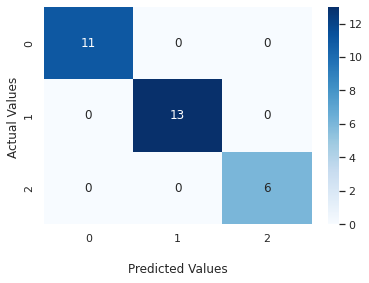

In [31]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(data_train, target_train)
y_pred = nb.predict(data_train)
score = metrics.accuracy_score(target_train, y_pred)
print('Accuracy Scores for Naive Bayes Classifier On Training dataset:{}'.format(score))

Accuracy Scores for Naive Bayes Classifier On Training dataset:0.95


In [33]:
y_pred = nb.predict(data_test)
score = metrics.accuracy_score(target_test, y_pred)
print('Accuracy Scores for Naive Bayes Classifier On Test dataset:{}'.format(score))

Accuracy Scores for Naive Bayes Classifier On Test dataset:0.9666666666666667


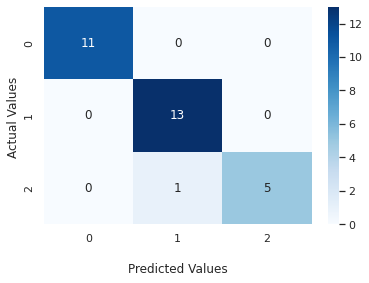

In [34]:
cnf_matrix = confusion_matrix(target_test, y_pred)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

# Task 3: Observe the Decision Boundary

## Train with Two Features

In [35]:
X = df.iloc[:, [0,2]].values
Y = data.target

## Generating Test data

In [36]:
x = np.linspace(0, 7, 70)
y = np.linspace(0, 3, 30)

#generate all possible value pairs of x and y
xx, yy = np.meshgrid(x, y)
length, width = xx.shape
n_test = length*width

#make a single column of feature values

f1 = xx.reshape(n_test, 1)
f2 = yy.reshape(n_test, 1)

#make test data with above two features

test_data = np.concatenate([f1, f2], axis = 1)
print(test_data.shape)


(2100, 2)


## KNN 

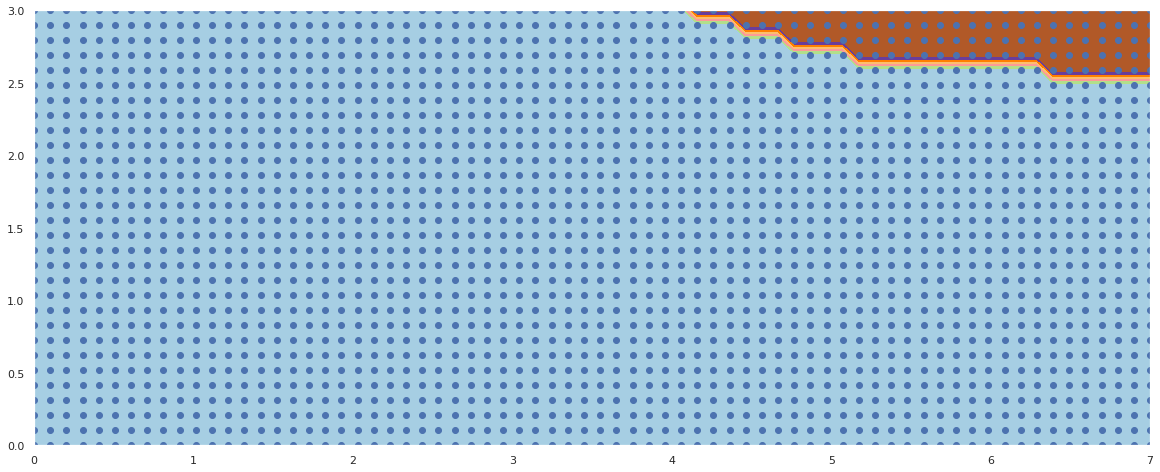

In [37]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, Y)
y_pred = knn.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Multi Layer Perceptron

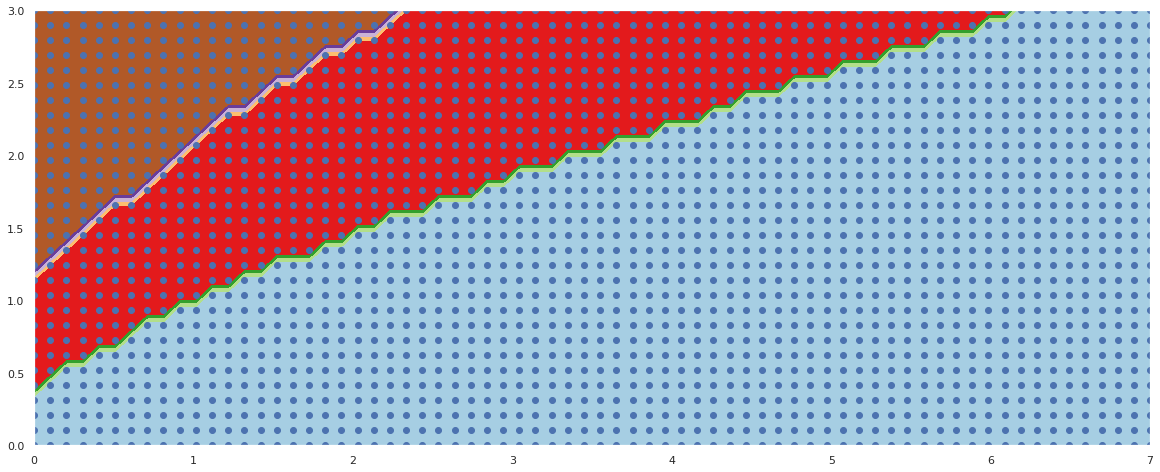

In [38]:
mlp.fit(X, Y)
y_pred = mlp.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Support Vector Machine: RBF

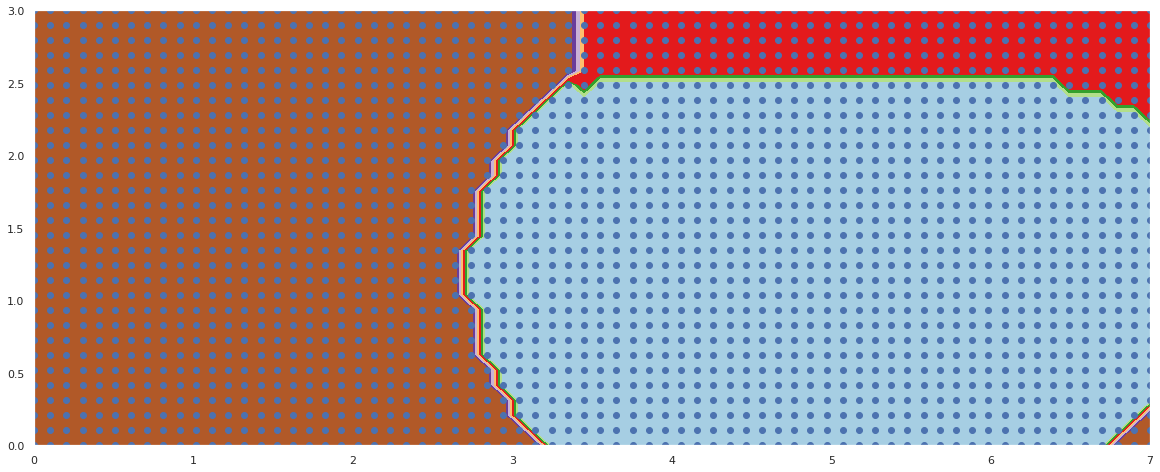

In [39]:
svm_rbf.fit(X, Y)
y_pred = svm_rbf.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Support Vector Machine: Linear

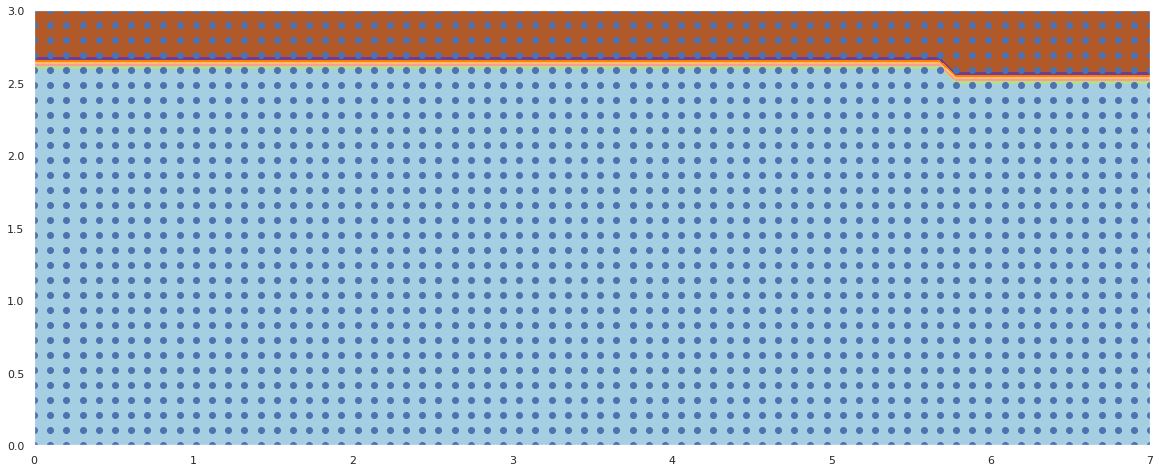

In [40]:
svm_linear.fit(X, Y)
y_pred = svm_linear.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Support Vector Machine: Poly

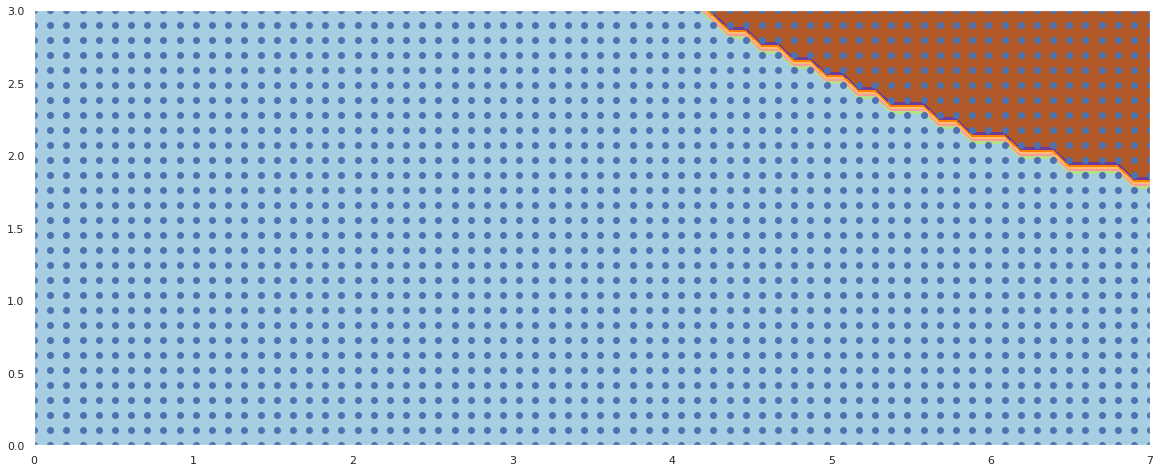

In [41]:
svm_poly.fit(X, Y)
y_pred = svm_poly.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Logistic Regression

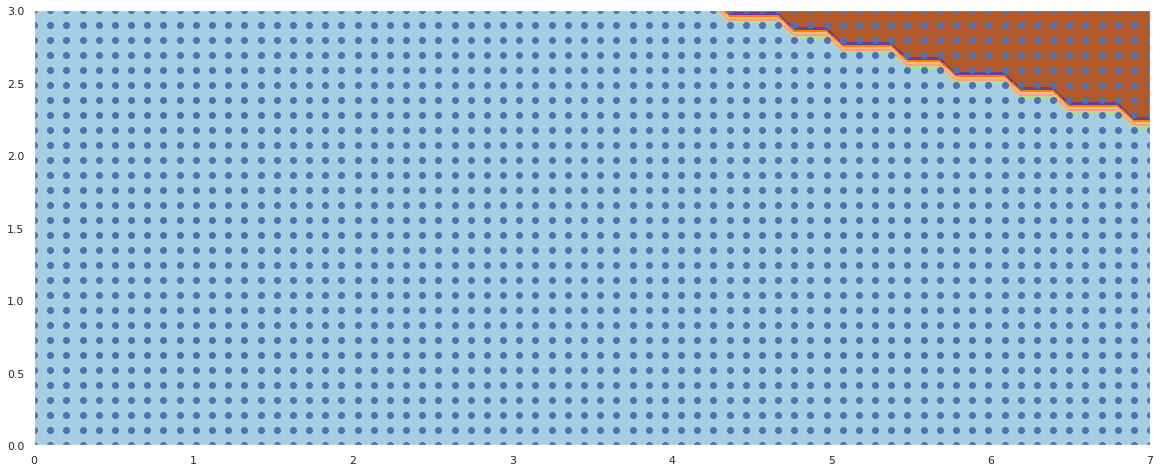

In [42]:
log.fit(X, Y)
y_pred = log.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Decision Tree Classifier

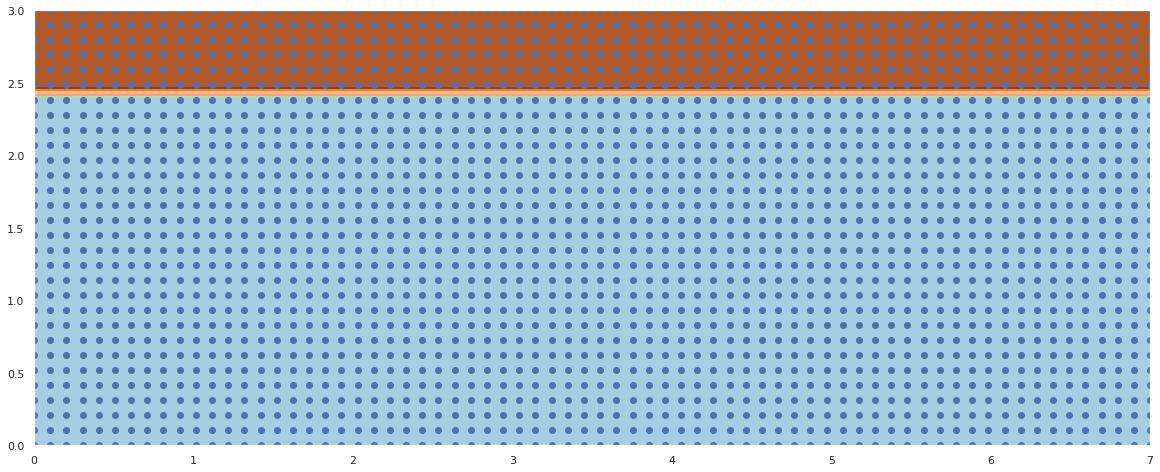

In [43]:
decision_tree.fit(X, Y)
y_pred = decision_tree.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Random Forest Classifier

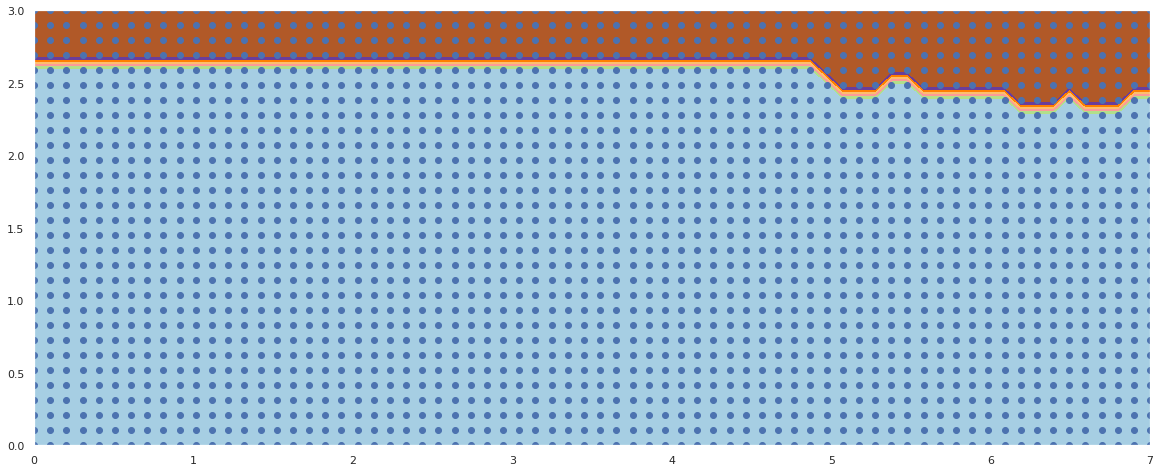

In [44]:
random_forest.fit(X, Y)
y_pred = random_forest.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

## Naive Bayes Classifier


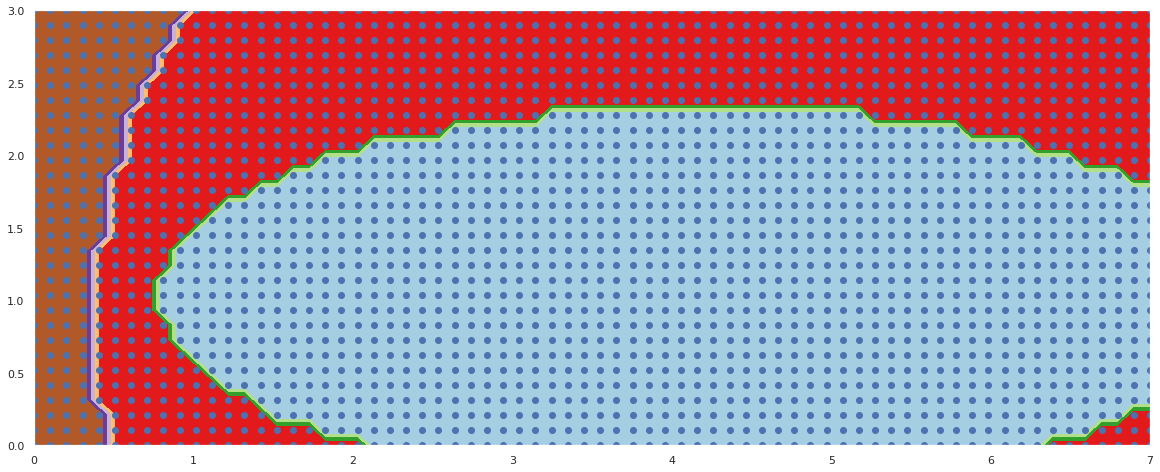

In [45]:
nb.fit(X, Y)
y_pred = nb.predict(test_data)
zz = y_pred.reshape(xx.shape)
plt.figure(figsize=(20, 8)) 
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(f1,f2,cmap='Paired')
plt.show()

# Task 4: Tuning the Hyper-parameters

After tuning the hyper paramenters, it is seen that :
<ul>
    <li>KNN classifiers gives better performance when the number of neighbours is 12.</li> 
    <li>Then multilayer perceptron provides best result when the number of iterations is 300, hidden layer size is 70 and learning rate, alpha is 0.0001 .</li>
    <li>In Support Vector Machine, in all three cases, accuracy is same when we set the gamma to 'auto'.But if wes set the value of gamma manually(0.01) then the SVM:Linear performs better.</li>
    <li>In Logistic Regression,penalty doesn't have any effect on the accuracy score.</li>
    <li>In Decision Tree classifier,no difference has been occured if we change the criterion.</li>
    <li>In Random Forest classifier,default number of trees is 100,but if we set it to 15,then it works perfectly for this task. </li>
    <li>In Naive bayes performs ,both Gaussian and Multinomial have the same 100% accuracy both on training and test data.</li>
</ul>

# Task 5 : Principal Component Analysis

## Principal Component Analysis

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.data)
print(principal_components.shape)

(150, 2)


In [47]:
df_pca = pd.DataFrame(data= np.c_[principal_components,data.target], 
                      columns = ['Component1','Component2','Target'])
df_pca.head()

,Component1,Component2,Target
0,-2.684126,0.319397,0.0
1,-2.714142,-0.177001,0.0
2,-2.888991,-0.144949,0.0
3,-2.745343,-0.318299,0.0
4,-2.728717,0.326755,0.0


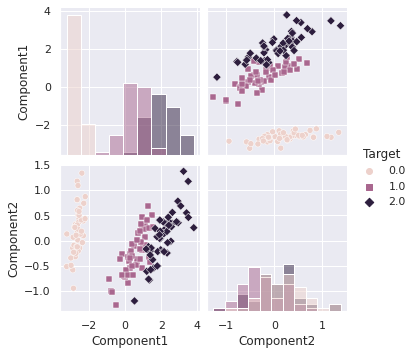

In [48]:
sns.pairplot(df_pca, hue='Target', diag_kind="hist", markers=["o", "s", "D"])
plt.show()

## Train Test Split

In [49]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(
                    principal_components,data.target, test_size=0.2, 
                    random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train_pca.shape[0], X_test_pca.shape[0]))

There are 120 samples in the training set and 30 samples in the test set


In [50]:
Y_train_pca.shape

(120,)

## KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, Y_train_pca)
y_pred = knn.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = knn.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for KNN on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for KNN on Training Dataset:0.9666666666666667 and on Test Dataset: 1.0 


## Multi Layer Perceptron

In [52]:
mlp.fit(X_train_pca, Y_train_pca)
y_pred = mlp.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = mlp.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for KNN on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for KNN on Training Dataset:0.9583333333333334 and on Test Dataset: 1.0 


## Support Vector Machine: RBF Kernel

In [53]:
svm_rbf.fit(X_train_pca, Y_train_pca)
y_pred = svm_rbf.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = svm_rbf.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for SVM:RBF on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for SVM:RBF on Training Dataset:0.9583333333333334 and on Test Dataset: 1.0 


## Support Vector Machine: Linear Kernel

In [54]:
svm_linear.fit(X_train_pca, Y_train_pca)
y_pred = svm_linear.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = svm_linear.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for SVM:Linear on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for SVM:Linear on Training Dataset:0.9583333333333334 and on Test Dataset: 1.0 


## Support Vector Machine: Poly Kernel

In [55]:
svm_poly.fit(X_train_pca, Y_train_pca)
y_pred = svm_poly.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = svm_poly.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for SVM:Poly on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for SVM:Poly on Training Dataset:0.9583333333333334 and on Test Dataset: 0.9666666666666667 


## Logistic Regression

In [56]:
log.fit(X_train_pca, Y_train_pca)
y_pred = log.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = log.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for Logistic Regression on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for Logistic Regression on Training Dataset:0.9583333333333334 and on Test Dataset: 1.0 


## Decision Tree Classifier

In [57]:
decision_tree.fit(X_train_pca, Y_train_pca)
y_pred = decision_tree.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = decision_tree.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for Decision Tree Classifier on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for Decision Tree Classifier on Training Dataset:1.0 and on Test Dataset: 1.0 


## Random Forest Classifier

In [58]:
random_forest.fit(X_train_pca, Y_train_pca)
y_pred = random_forest.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = random_forest.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for Random Forest Classifier on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for Random Forest Classifier on Training Dataset:0.9916666666666667 and on Test Dataset: 1.0 


## Naive Bayes Classifier

In [59]:
nb.fit(X_train_pca, Y_train_pca)
y_pred = nb.predict(X_train_pca)
scores_train = metrics.accuracy_score(Y_train_pca, y_pred)
y_pred = nb.predict(X_test_pca)
scores_test = metrics.accuracy_score(Y_test_pca, y_pred)

print('Accuracy Score for Naive Bayes Classifier on Training Dataset:{} and on Test Dataset: {} '
      .format(scores_train, scores_test))

Accuracy Score for Naive Bayes Classifier on Training Dataset:0.9166666666666666 and on Test Dataset: 0.8666666666666667 
